In [108]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier as KNC

from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import roc_auc_score as auc
from sklearn.metrics import f1_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import recall_score

from sklearn.metrics import plot_confusion_matrix as pcm
from sklearn.metrics import plot_precision_recall_curve as ppc
from sklearn.metrics import plot_roc_curve as prc

from sklearn.model_selection import cross_validate as cv

In [17]:
# Some arbitrary data transformation for easier handling

train = pd.read_csv('data/train.csv') # train data
train = train[['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
train = pd.get_dummies(train)
train = train.fillna(train.median())

test = pd.read_csv('data/test.csv') # test data
test = test[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
test = pd.get_dummies(test)
test = test.fillna(test.median())

res = pd.read_csv('data/gender_submission.csv') # ground truth
res = res['Survived']

# Split train to features and targets

Y_train = np.array(train.iloc[:, [0]])
X_train = train.drop(train.iloc[:, [0]].columns, axis=1)

In [84]:
# Training KNeighbors Classifier

knc = KNC()
knc.fit(X_train, Y_train.ravel())
Y_test_knc = knc.predict(test)

In [85]:
# Training Decision Tree Classifier

clf = DTC(criterion='entropy', random_state=42)
clf.fit(X_train, Y_train.ravel())
Y_test_clf = clf.predict(test)

#### accuracy score

In [91]:
acc(res, Y_test_knc)

0.6913875598086124

In [92]:
acc(res, Y_test_clf)

0.7870813397129187

#### AUC score

In [94]:
auc(res, Y_test_knc)

0.6715225563909776

In [95]:
auc(res, Y_test_clf)

0.7749060150375939

#### Plotting confusion matrix

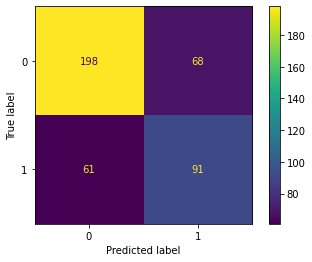

In [97]:
pcm(knc, test, res)

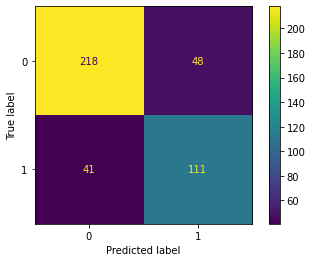

In [98]:
pcm(clf, test, res)

#### Plotting precision recall curve

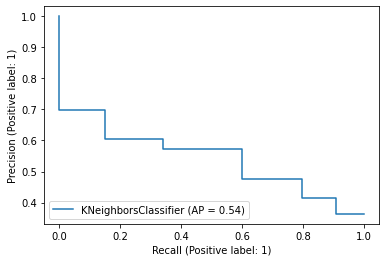

In [99]:
ppc(knc, test, res)

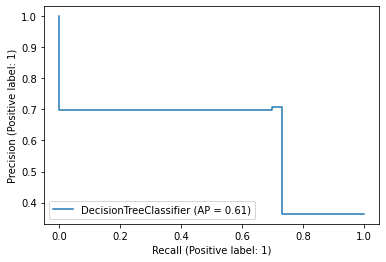

In [100]:
ppc(clf, test, res)

#### Plotting ROC curve

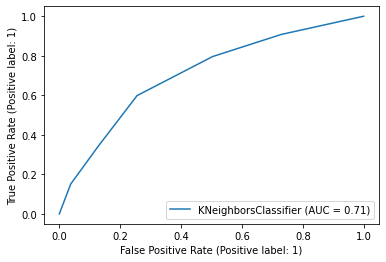

In [101]:
prc(knc, test, res)

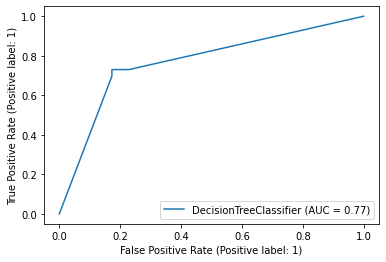

In [102]:
prc(clf, test, res)

#### Cross-validation in Sklearn

In [103]:
cv_results = cv(knc, X_train, np.ravel(Y_train), cv=6)
print(cv_results['test_score'])

[0.65100671 0.71812081 0.75838926 0.70945946 0.7027027  0.77027027]


In [104]:
cv_results = cv(clf, X_train, np.ravel(Y_train), cv=6)
print(cv_results['test_score'])

[0.76510067 0.7852349  0.77852349 0.77702703 0.80405405 0.79054054]


#### f1 score

In [105]:
f1_score(res, Y_test_knc)

0.5852090032154341

In [106]:
f1_score(res, Y_test_clf)

0.7138263665594855

#### balanced accuracy

In [109]:
balanced_accuracy_score(res, Y_test_knc)

0.6715225563909775

In [110]:
balanced_accuracy_score(res, Y_test_clf)

0.7749060150375939

#### recall

In [113]:
recall_score(res, Y_test_knc)

0.5986842105263158

In [114]:
recall_score(res, Y_test_clf)

0.7302631578947368